In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Xopt class, TNK test function

This is the class method for running Xopt.

TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [2]:
# Import the class
from xopt import Xopt

The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [3]:
import yaml
# Make a proper input file. 
YAML="""
xopt: {output_path: null, verbose: true}

algorithm:
  name: mobo
  options: {ref: [1.4, 1.4],
            n_initial_samples: 5,
            batch_size: 4,
            mc_samples: 128,
            use_gpu: False,
            n_steps: 50, 
            verbose: True}
  
simulation: 
  name: test_TNK
  evaluate: xopt.evaluators.test_TNK.evaluate_TNK  
  
vocs:
  name: TNK_test
  description: null
  simulation: test_TNK
  templates: null
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: ['LESS_THAN', 0.5]
  linked_variables: {x9: x1}
  constants: {a: dummy_constant}

"""
config = yaml.safe_load(YAML)

In [4]:
# Optional: Connect the function directly
#from xopt.evaluators.test_TNK import evaluate_TNK 
#config['simulation']['evaluate'] = evaluate_TNK 

X = Xopt(config)
X

Loading config as dict.



            Xopt 
________________________________           
Version: 0.4.3
Configured: True
Config as YAML:
xopt: {output_path: null, verbose: true}
algorithm:
  name: mobo
  function: xopt.mobo.mobo
  options:
    ref: [1.4, 1.4]
    n_initial_samples: 5
    batch_size: 4
    mc_samples: 128
    use_gpu: false
    n_steps: 50
    verbose: true
    executor: null
    model_options: null
    seed: null
    return_model: false
    initial_x: null
    plot_acq: false
simulation:
  name: test_TNK
  evaluate: xopt.evaluators.test_TNK.evaluate_TNK
  options: {extra_option: abc}
vocs:
  name: TNK_test
  description: null
  simulation: test_TNK
  templates: null
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: {x9: x1}
  constants: {a: dummy_constant}

In [5]:
# Note that the repr string contains all of the config information
X.random_evaluate()

{'y1': 2.7919907666820896,
 'y2': 0.761814760901189,
 'c1': 7.419108670852612,
 'c2': 5.3217686435816995,
 'some_array': array([1, 2, 3])}

# Run MOBO

MOBO is designed to run in serial or parallel

In [6]:
# Pick one of these
from concurrent.futures import ThreadPoolExecutor as PoolExecutor
#from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [7]:
# Change max generations
X.run(executor=executor)

Starting at time 2021-08-03T10:43:14-05:00
n_feas: 2
tensor([[0.0000, 0.9017],
        [0.6146, 0.9567],
        [0.0000, 1.5208],
        [0.4651, 0.1822]], dtype=torch.float64)
Step : 0, hypervolume : 0.22852773615524868
n_feas: 4
tensor([[0.7998, 0.5829],
        [0.1984, 1.0925],
        [0.8941, 0.0000],
        [0.0000, 0.0000]], dtype=torch.float64)
Step : 1, hypervolume : 0.394881644412827
n_feas: 7
tensor([[0.0523, 1.0182],
        [1.0545, 0.2513],
        [0.9902, 0.4568],
        [0.5143, 0.8173]], dtype=torch.float64)
Step : 2, hypervolume : 0.7004804154424585
n_feas: 10
tensor([[0.0611, 1.0377],
        [1.0089, 0.0425],
        [0.2220, 0.9463],
        [0.6569, 0.6794]], dtype=torch.float64)
Step : 3, hypervolume : 0.8766019689630744
n_feas: 12
tensor([[1.0334, 0.0741],
        [0.8525, 0.2250],
        [0.0000, 0.3984],
        [0.7381, 0.4151]], dtype=torch.float64)
Step : 4, hypervolume : 0.9703849604446289
n_feas: 13
tensor([[0.8310, 0.4938],
        [0.7493, 0.6773

# Plot

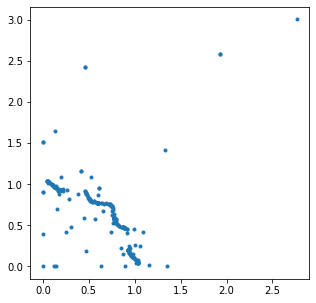

In [8]:
# plot objective results
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

train_y = X.results[1].numpy()

ax.plot(*train_y.T, '.')
